# Assignment - 4

In [32]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Question-1

## 1.(a)

In [33]:
# Function of x[n].
def x_n(l,u,n):
    out = []
    for j in n:
        if (j>=l) and (j<=u):
            out.append(1)
        else:
            out.append(0)
    return out

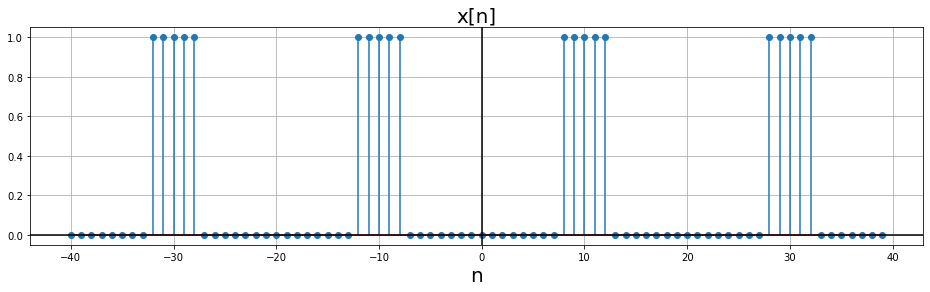

In [34]:
plt.subplots(figsize=(16,4))
l = -2
u = 2
t = 4
n1 = np.arange(-10,10,1)
o=x_n(l,u,n1)
output = o*t
n2 = np.arange(-40,40,1)
plt.stem(n2,output)
plt.xlabel('n',fontsize=20)
plt.title('x[n]',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

## 1.(b)

In [35]:
# Function of Ck.
def DTFS(x):
    N = len(x)
    out = []
    for k in range(N):
        ck = 0
        for n in range(N):
            ck+=((x[n]*np.exp(-2j*np.pi*k*n/N))/N)
        out.append(ck)
    return out

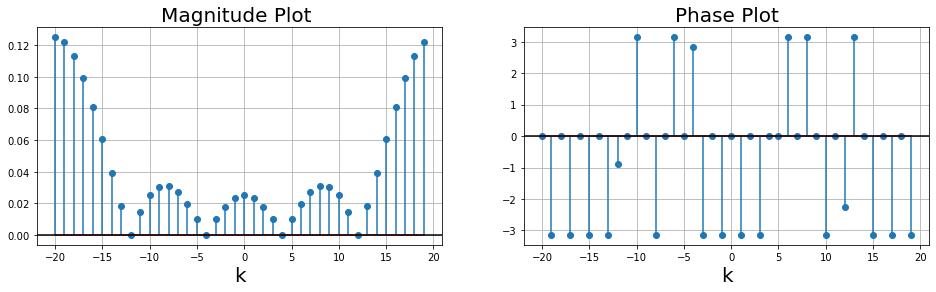

In [36]:
fig,axes = plt.subplots(1,2,figsize=(16,4))

l = -2
u = 2
n1 = np.arange(-20,20,1)
x = x_n(l,u,n1)
C_k = DTFS(x)

# Magnitude plot of c[k].
axes[0].stem(n1,np.absolute(C_k))
axes[0].set_xlabel('k',fontsize=20)
axes[0].set_title('Magnitude Plot ',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

#Phase plot of c[k].
axes[1].stem(n1,np.angle(C_k))
axes[1].set_xlabel('k',fontsize=20)
axes[1].set_title('Phase Plot',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

# Question-2

In [37]:
# Function for reconstruction of x[n]
def xn(c,M):
    N = len(c)
    out = []
    for n in range(N):
        x = 0
        for k in range((2*M)+1):
            x+=(c[k]*np.exp(2j*np.pi*k*n/N))
        out.append(x)
    return out

## 2.(a)

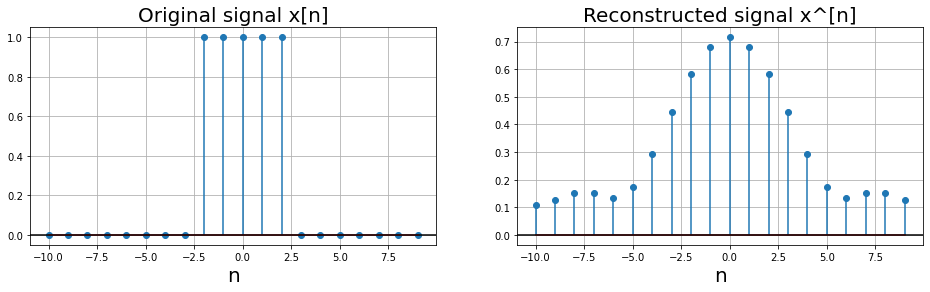

In [38]:
fig,axes = plt.subplots(1,2,figsize=(16,4))

n1 = np.arange(-10,10,1)

# Plot of original signal x[n].

l = -2
u = 2
x = x_n(l,u,n1)

axes[0].stem(n1,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('Original signal x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of reconstructed signal x^[n].

M = 2
C_k = DTFS(x)
X_n = xn(C_k,M)

axes[1].stem(n1,np.absolute(X_n))
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_title('Reconstructed signal x^[n]',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

## 2.(b)

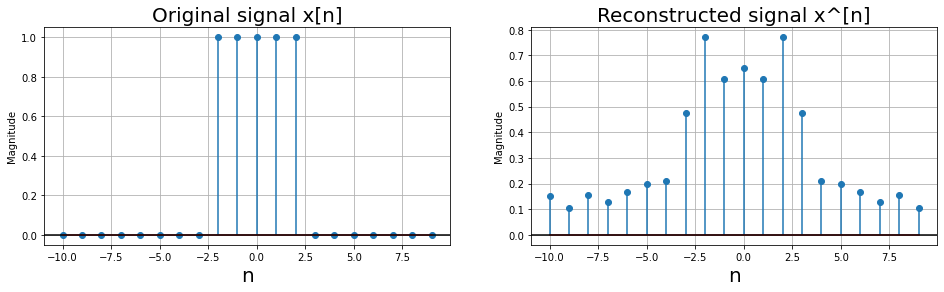

In [39]:
fig,axes = plt.subplots(1,2,figsize=(16,4))

n1 = np.arange(-10,10,1)

# Plot of original signal x[n].

l = -2
u = 2
x = x_n(l,u,n1)

axes[0].stem(n1,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Original signal x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# Plot of reconstructed signal x^[n].

M = 5
C_k = DTFS(x)
X_n = xn(C_k,M)

axes[1].stem(n1,np.absolute(X_n))
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('Magnitude')
axes[1].set_title('Reconstructed signal x^[n]',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

### Observation-
                 When we reconstruct signal using more number of DTFS coefficient then we get shape towards actual shape.

# Question-3

## 3.(a)

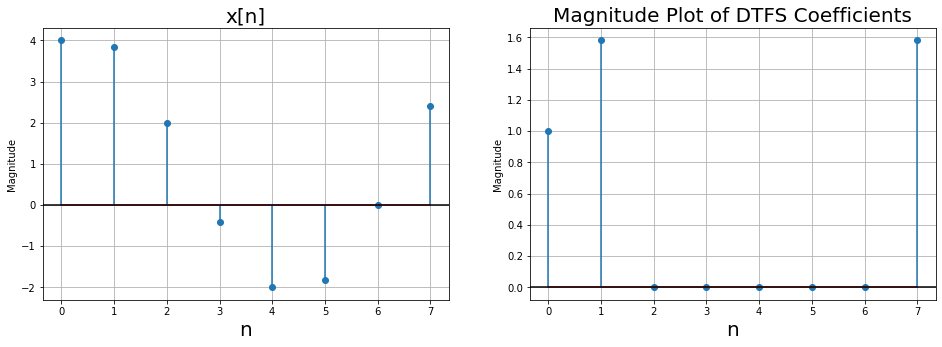

In [26]:
fig,axes = plt.subplots(1,2,figsize=(16,5))

n1 = np.arange(0,8,1)


# Plot of original signal x[n].

N = 8
x=1+np.sin(2*np.pi*n1/N)+3*np.cos(2*np.pi*n1/N)


axes[0].stem(n1,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].set_ylabel('Magnitude')
axes[0].axhline(color = "Black");
axes[0].grid()


dtfs_x = DTFS(x)

axes[1].stem(n1,np.absolute(dtfs_x))
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('Magnitude')
axes[1].set_title('Magnitude Plot of DTFS Coefficients',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

## 3.(b)

In [10]:
N=8
energy_x,energy_ck=0,0
ck=np.abs(dtfs_x)
for i in range(N):
    energy_x+=(x[i]**2)
    energy_ck+=(ck[i]**2)
print("LHS :",energy_x/N)   
print("RHS :",energy_ck)

LHS : 6.0
RHS : 6.000000000000002


# Question-4

In [11]:
# Function for DTFT.
def DTFT(x,omegha):
    n = len(x)
    dtft = 0
    for i in range(n):
        dtft+=x[i]*(np.exp(-1j*omegha*i))
    return dtft

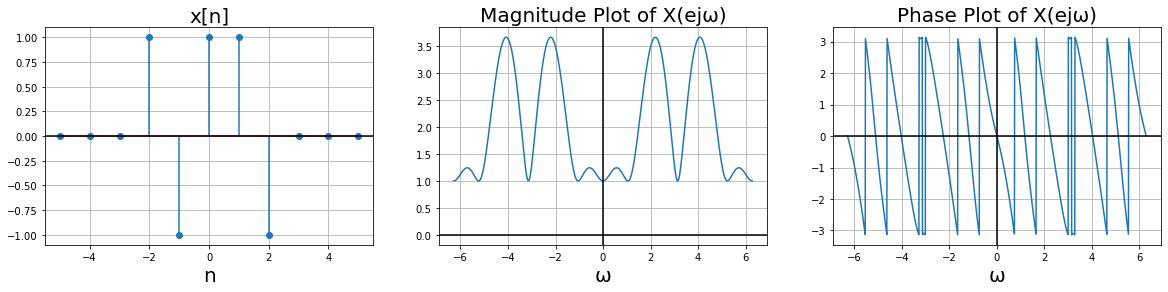

In [12]:
fig,axes = plt.subplots(1,3,figsize=(20,4))

#  x[n]
n1 = np.arange(-5,6,1)
xn=np.zeros(len(n1))
for i in range(len(n1)):
        if n1[i]== -2 or n1[i]==0 or n1[i]==1:
             xn[i]=1       
        elif n1[i]==-1 or n1[i]==2 :
             xn[i]=-1
        else:
             xn[i]=0

axes[0].stem(n1,xn)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


omegha = np.arange(-2*np.pi,2*np.pi,0.01)
X_om = DTFT(xn,omegha)

# Magnitude plot

axes[1].plot(omegha,np.absolute(X_om))
axes[1].set_xlabel('ω',fontsize=20)
axes[1].set_title('Magnitude Plot of X(ejω)',fontsize=20)
axes[1].axhline(color = "Black")
axes[1].axvline(color = "Black")
axes[1].grid()

# Phase plot 

axes[2].plot(omegha,np.angle(X_om))
axes[2].set_xlabel('ω',fontsize=20)
axes[2].set_title('Phase Plot of X(ejω)',fontsize=20)
axes[2].axhline(color = "Black")
axes[2].axvline(color = "Black")
axes[2].grid()

# Question-5

In [13]:
# function
def x_n_1(a,n):
    unit =[]
    for sample in n:
        if sample < 0:
            unit.append(0)
        else:
            unit.append(a**sample)
    return unit

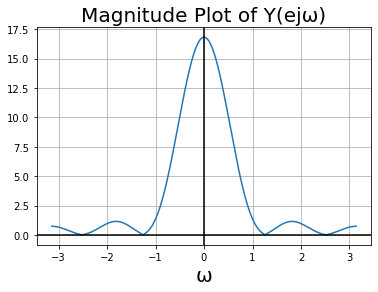

In [14]:
n1 = np.arange(-5,5,1)

# signal h[n].
a1 = 1
h_n = x_n_1(a1,n1)

# signal x[n].
a2 = 0.8
x_n = x_n_1(a2,n1)

# signal y[n].
y = np.convolve(x_n,h_n)

# Plot of DTFT of y[n].

omega = np.arange(-np.pi,np.pi,0.01)
dtft_y = DTFT(y,omega)

plt.plot(omega,np.absolute(dtft_y))
plt.xlabel('ω',fontsize=20)
plt.title('Magnitude Plot of Y(ejω)',fontsize=20)
plt.axhline(color = "Black")
plt.axvline(color = "Black")
plt.grid()


# Question-6

## 6.(a)

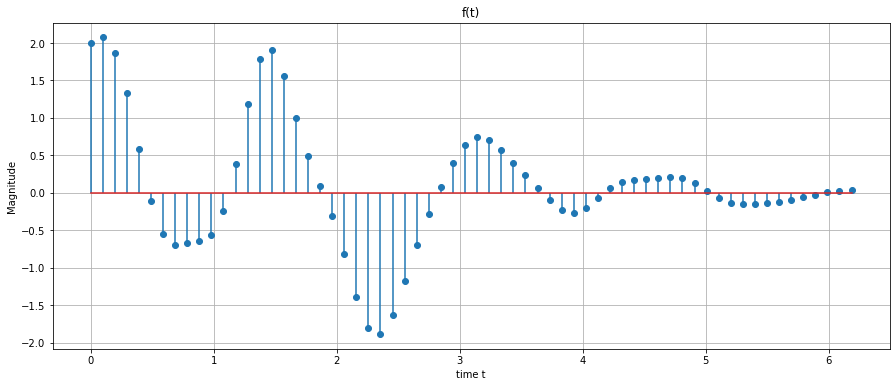

In [42]:
# t=np.linspace(0,2*np.pi,64)

t=np.arange(0,2*np.pi,2*np.pi/64)
f=np.exp(-0.1*(t)**2)*(np.sin(2*t)+2*np.cos(4*t)+0.4*np.sin(t)*np.sin(10*t))
plt.figure(figsize=(15,6))
plt.stem(t,f)
plt.title('f(t)')
plt.xlabel("time t")
plt.ylabel('Magnitude')
plt.grid()
plt.show()

## 6.(b)

<ipython-input-43-077cedd66aee>:7: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  W=np.zeros((N,N),dtype = np.complex)


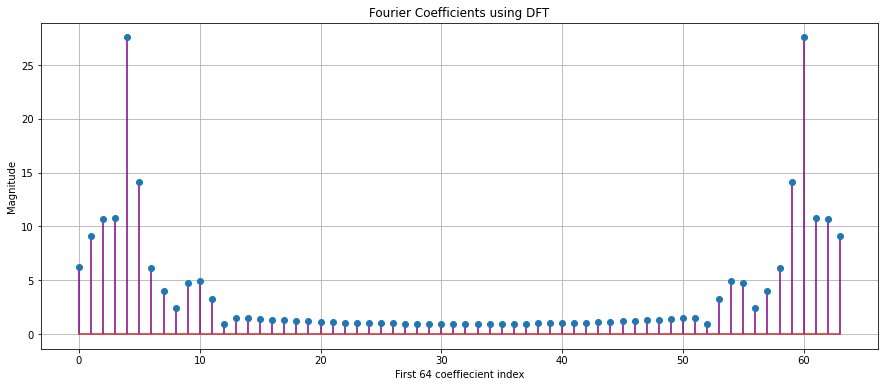

In [43]:
N=64
w=np.exp(-2j*np.pi/N)
p=[]
for i in range(N):
    p.append(w**i)
a=np.array(p)
W=np.zeros((N,N),dtype = np.complex)
for i in range(N):
    W[:,i]=a**i
coeff=np.matmul(W,f)  
#print(coeff)
plt.figure(figsize=(15,6))
plt.stem(range(N),np.abs(coeff),'purple')
plt.title( 'Fourier Coefficients using DFT' )
plt.xlabel("First 64 coeffiecient index")
plt.ylabel('Magnitude')
plt.grid()
plt.show()


# Question-7

## 7.(a)

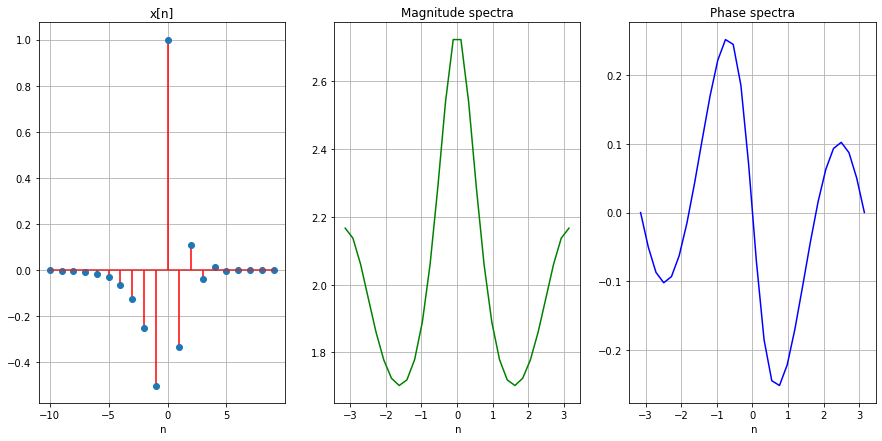

In [20]:
n=np.arange(-10,10,1)
x=np.zeros(len(n))
def unit(a,b,c):
    for i in range(len(n)):
        if(n[i]/b)<c:
            x[i]=0
        elif (n[i]/b)>=c :
            x[i]=(a)**(n[i]*b)
    return np.array(x)  
y1=unit((-1/3),1,0)
y2=unit(0.5,-1,1)
xn=y1-y2
#for magnitude and phase
w=np.linspace(-np.pi,np.pi,30)
a=np.exp(1j*w)
x1=a/(a+(1/3))
x2=a/(a-0.5)
X_z=x1+x2
fig, ax=plt.subplots(1,3,figsize=(15,7))        
ax[0].stem(n,xn,'r')
ax[0].set_title('x[n]')
ax[0].set_xlabel(" n")
ax[0].grid()
ax[1].plot(w,np.abs(X_z),'g')
ax[1].set_title('Magnitude spectra')
ax[1].set_xlabel(" n")
ax[1].grid()
ax[2].plot(w,np.angle(X_z),'b')
ax[2].set_title('Phase spectra')
ax[2].set_xlabel(" n")
ax[2].grid()
plt.show()


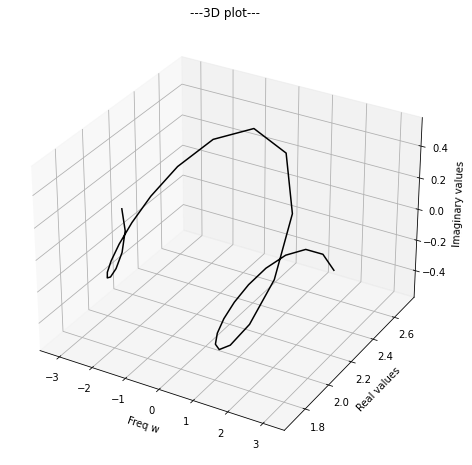

In [18]:
plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.plot3D(w, (X_z).real, ((X_z).imag),c='black')
ax.set_title('---3D plot---')
ax.set_xlabel("Freq w")
ax.set_ylabel("Real values")
ax.set_zlabel("Imaginary values")
plt.show()

## 7.(b)

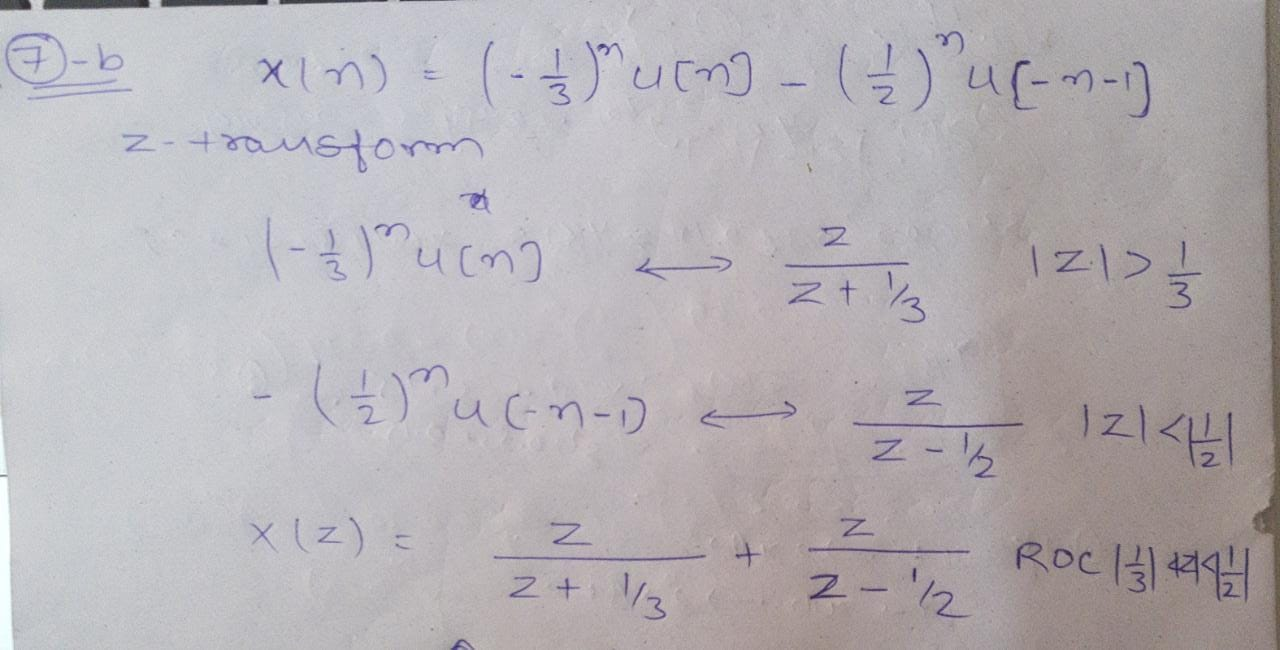

# Question-8

## 8.(a)

Zeros= [0. 0. 0.]
Poles= [ 0.5       +0.00000000e+00j -0.33333333+2.96942206e-09j
 -0.33333333-2.96942206e-09j]


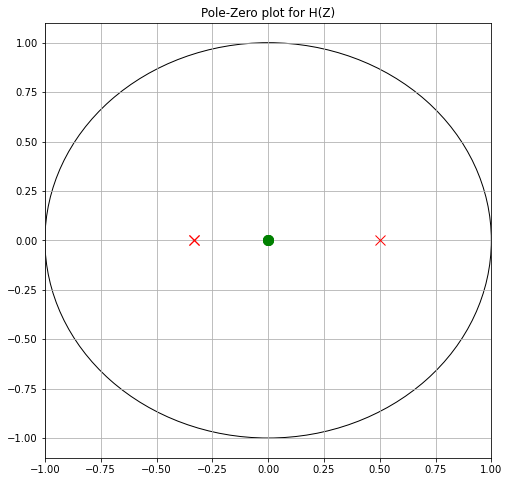

In [44]:
num = [18,0,0,0]
den=[18,3,-4,-1]
Z=np.roots(num)
print("Zeros=",Z)
P=np.roots(den)
print("Poles=",P)
plt.figure(figsize=(8,8))
plt.xlim([-1,1])
t1 = plt.plot(Z.real, Z.imag, 'go', ms=10)


# Plot the poles and set marker properties
t2 = plt.plot(P.real, P.imag, 'rx', ms=10)
circle1 = plt.Circle((0, 0), 1,fill=False)
plt.gca().add_patch(circle1)
plt.title('Pole-Zero plot for H(Z)')
plt.grid()
plt.show()

## 8.(b)

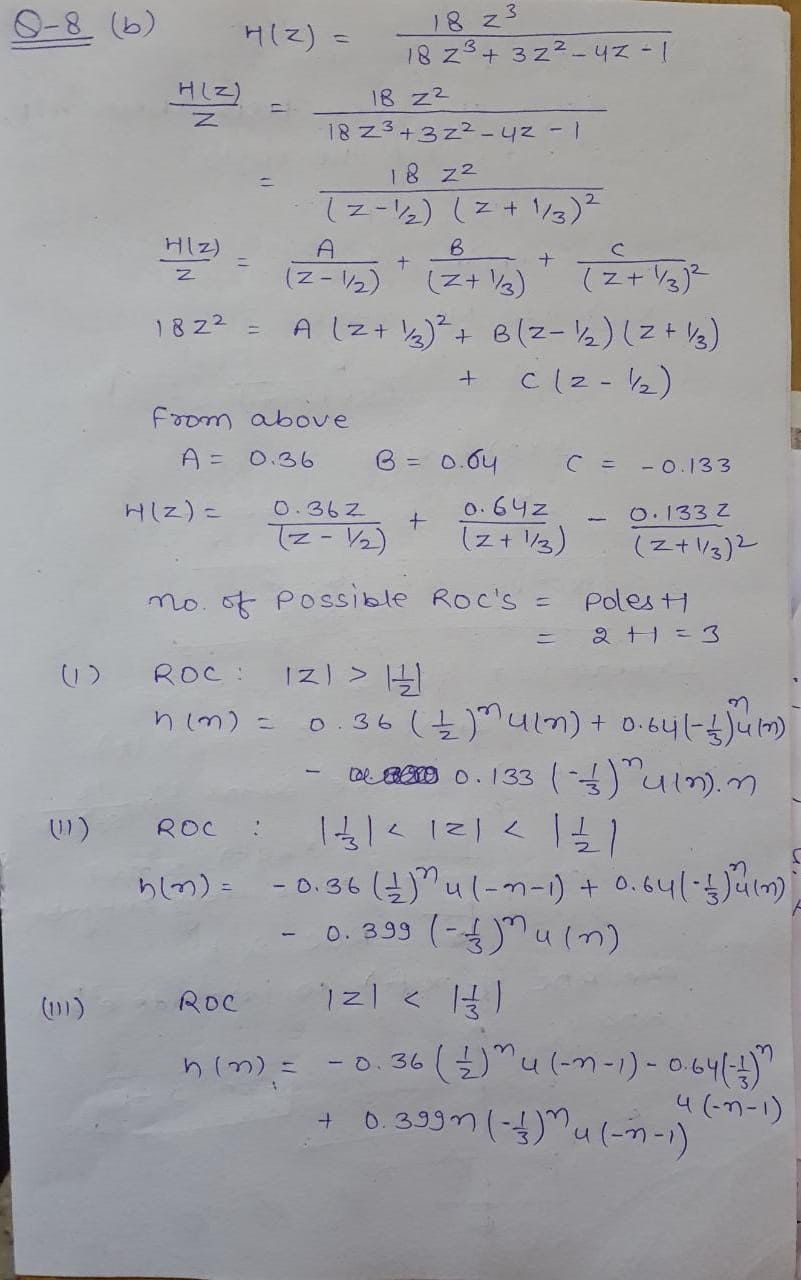

# Question-9

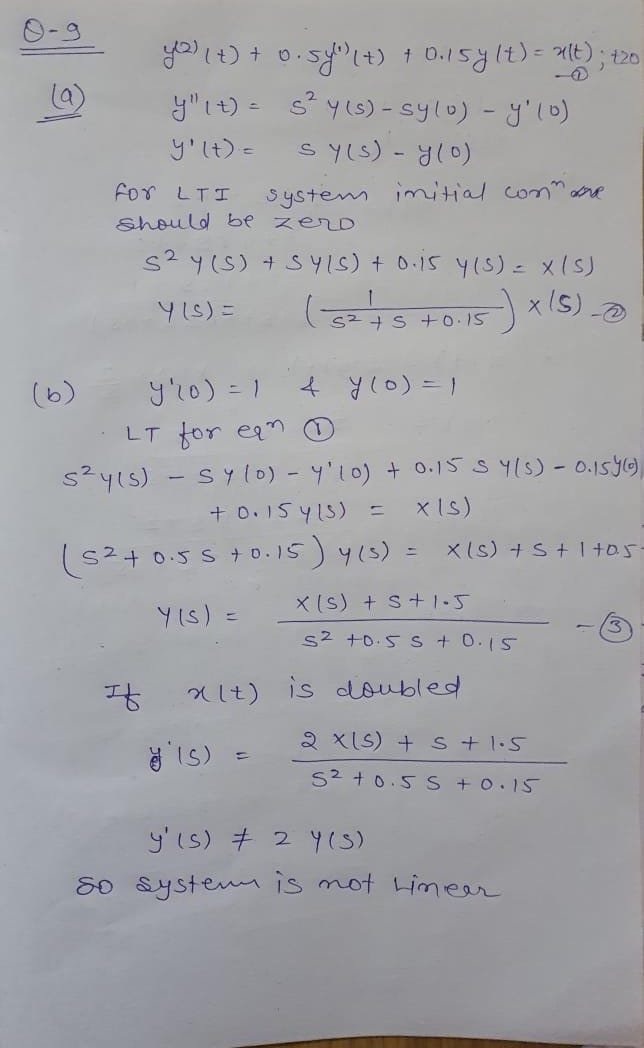

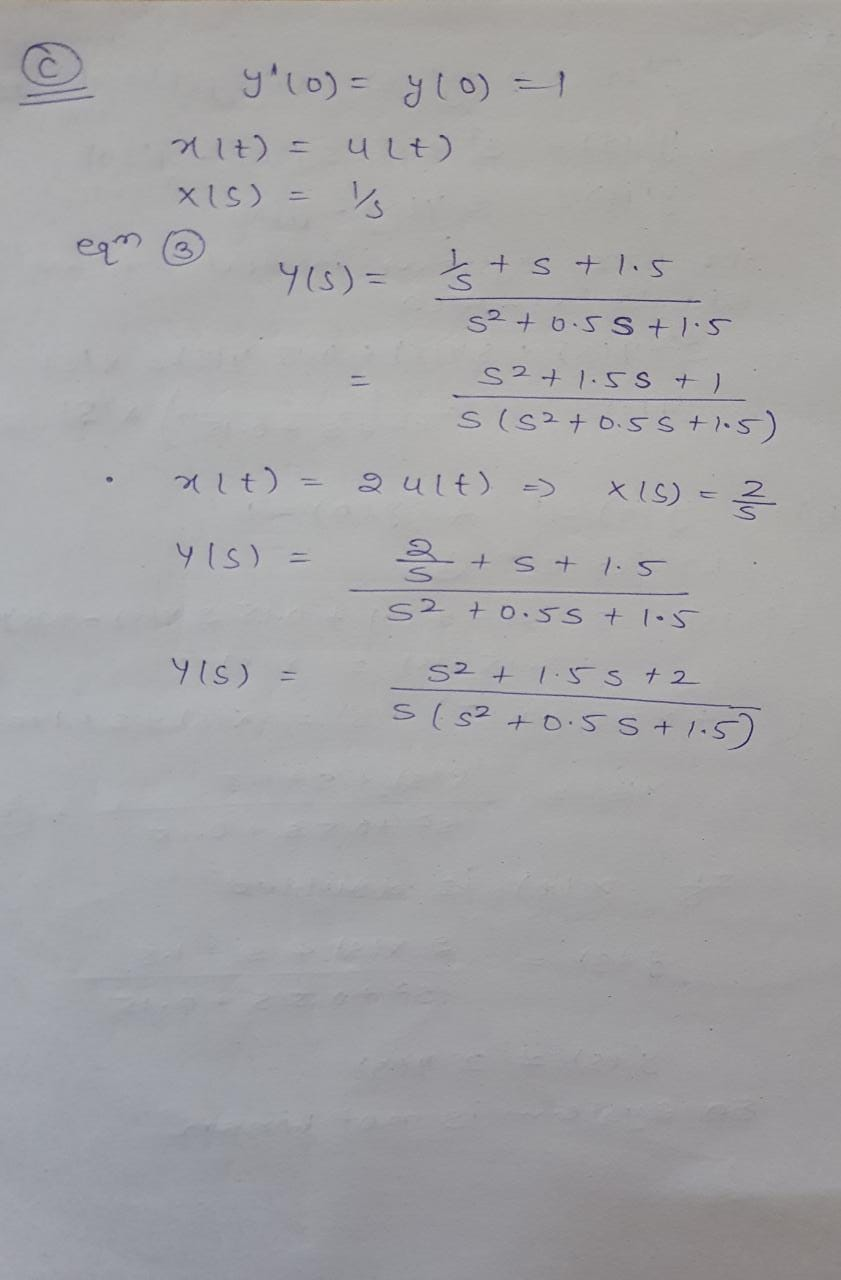

# Question-10

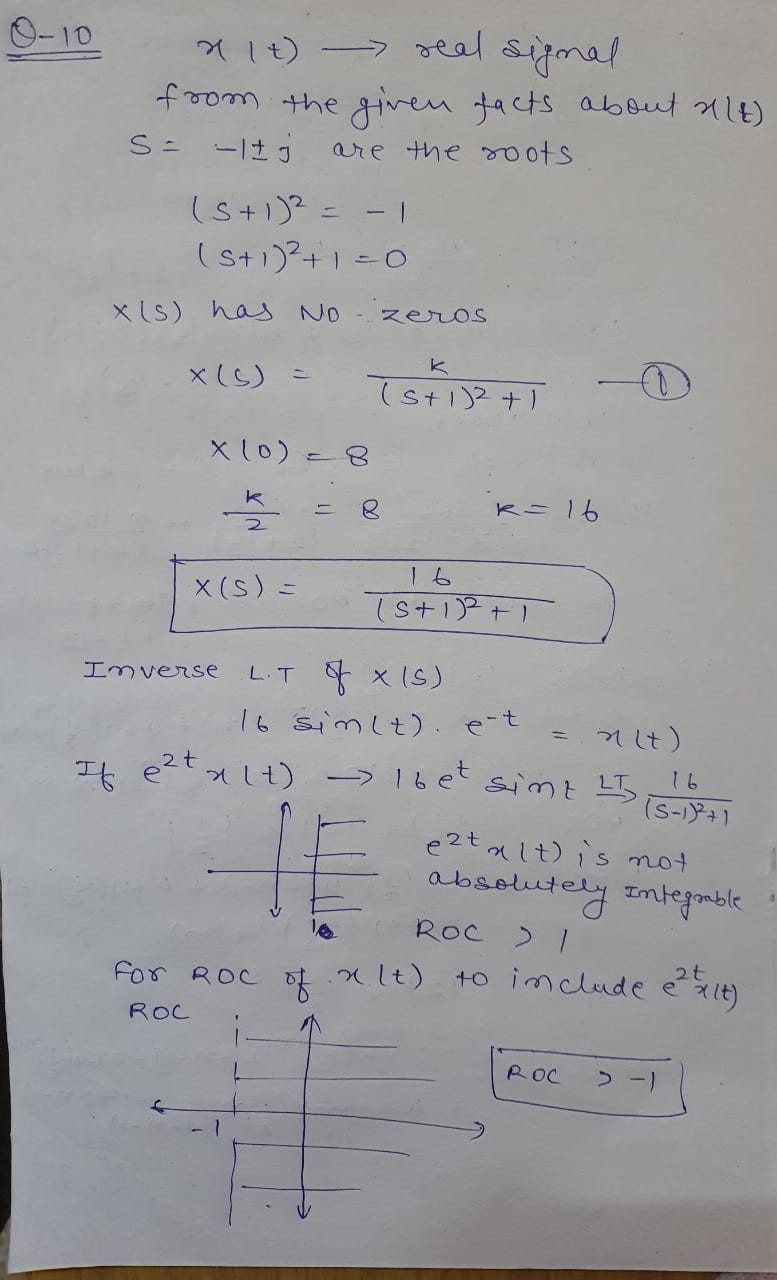